In [3]:
import os
import urllib
import random
import numpy as np
import pandas as pd
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical
from lib.optimizers import *
from lib.model import *
from lib.dataset import ImageClassificationDataset

from nnfs.datasets import sine_data

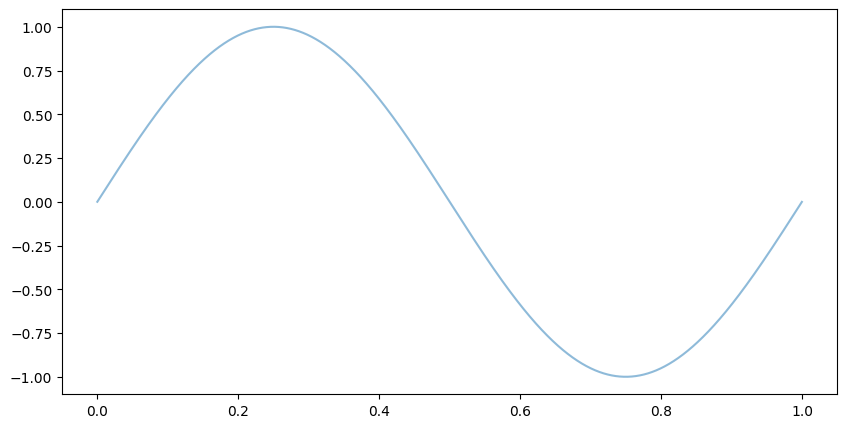

In [4]:
X, y = sine_data(samples=10000)

plt.figure(figsize=(10,5))
plt.plot (X, y, alpha=0.5)
plt.show()

In [10]:
model = Model()

model.add(Layer_Dense(X.shape[1], 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 1))
model.add(Activation_Linear())

model.set(
    loss=Loss_MeanSquaredError(),
    optimizer=Optimizer_Adam(),
    accuracy=Accuracy_Regression()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=None,
    epochs=1, 
    batch_size=8
    #,early_stop=5
)

Epoch(1/1), Training:   accuracy: 0.908, loss: 0.000, learning rate: 0.001000000000000, data loss: 0.000, regularization loss: 0.000000


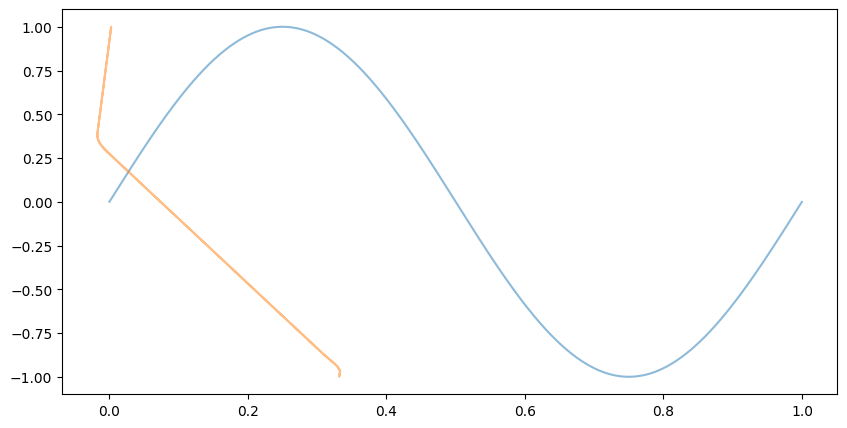

In [12]:
i = 1

predictions = model.predict(y)

plt.figure(figsize=(10,5))
plt.plot (X, y, alpha=0.5)
plt.plot (predictions, y, alpha=0.5)
plt.show()